# 독립 표본 T-검정 (이표본 검정, Independent two sample test)

- 서로 다른 두 개의 그룹 간 평균의 차이가 유의미한지 여부를 판단

- 데이터의 정규성과 등분산성을 만족해야 신뢰할 수 있는 결과를 얻을 수 있음

In [1]:
# !pip install statannot
# !pip install statannotations

In [2]:
import warnings 
warnings.filterwarnings(action='ignore')

import sys 
import seaborn as sns 
from math import sqrt
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from scipy.stats import t, ttest_ind, normaltest, bartlett, levene
from statannotations.Annotator import Annotator

In [3]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 9 
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.unicode_minus'] = False

#### 예제 1 - 지혈제 효과 비교

- 두 종류의 지혈제 효과를 측정한 자료

- 두 그룹에게 각각 A, B의 지혈제를 투여한 뒤 지혈 될 때까지 시간(분)을 측정

- 지혈제에 따른 지혈시간이 유의미한 차이가 있는지 확인

- 단, 모든 데이터는 정규성을 충족한다고 가정

In [4]:
origin = pd.read_excel("../rawdata/styptic.xlsx")
origin

,B,G
0,8.80,9.9
1,8.90,10.0
2,8.40,9.0
3,7.90,11.1
4,8.20,9.8
5,8.70,9.6
6,7.90,10.3
7,9.10,8.7
8,9.60,10.4
9,8.75,9.5


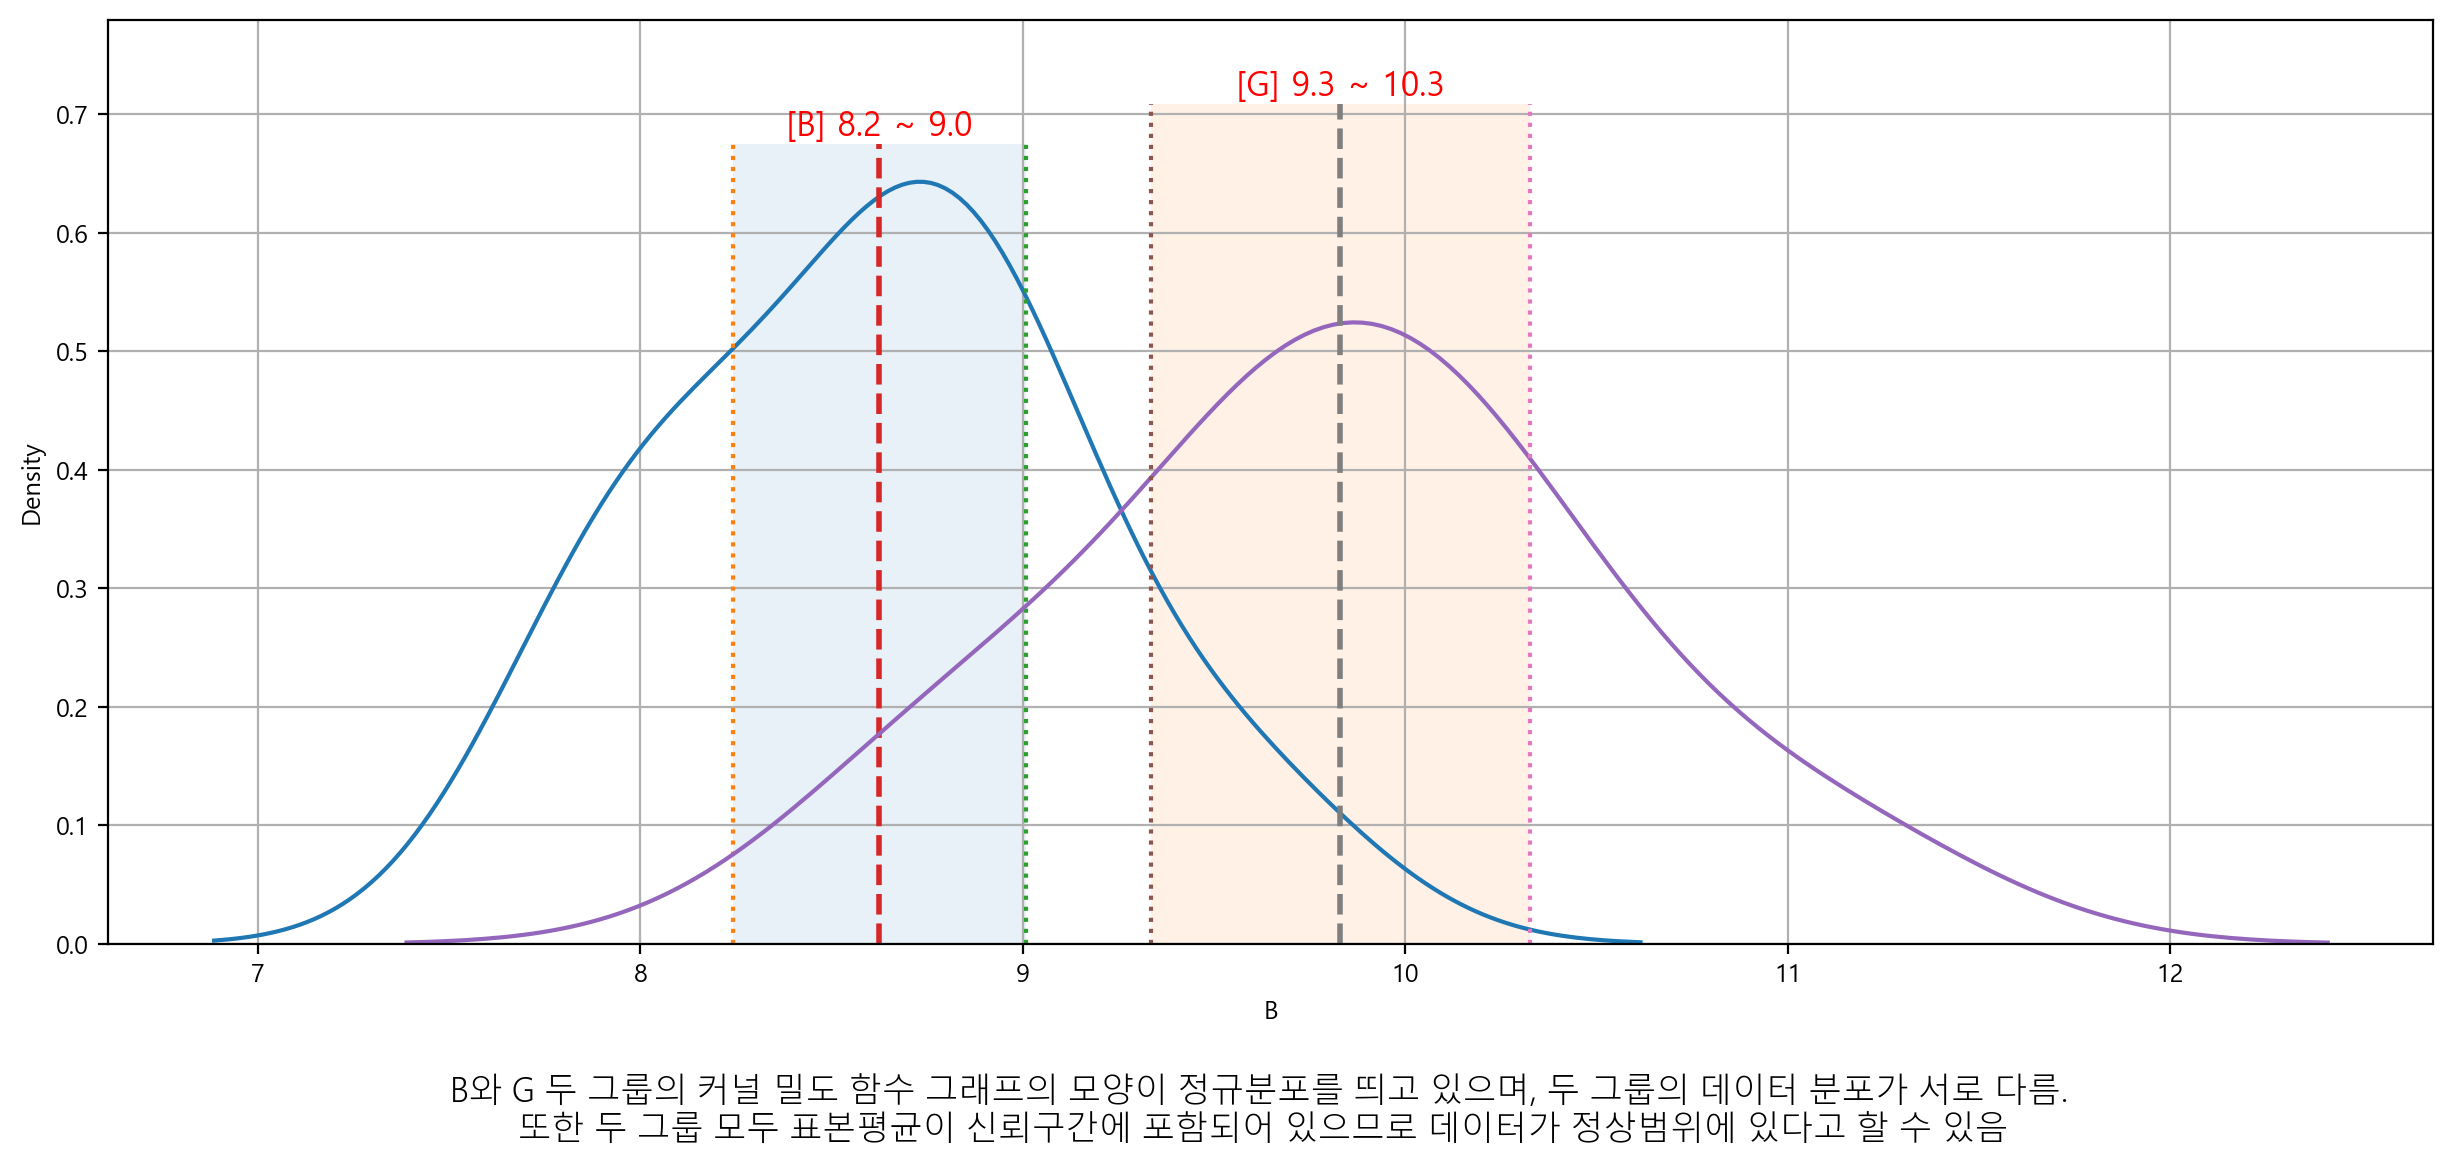

In [5]:
# 신뢰구간 확인

plt.figure()

for c in origin.columns:
    
    data = origin[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
    
    sns.kdeplot(data=data)
    
    xmin, xmax, ymin, ymax = plt.axis()
    
    # 신뢰구간 그리기 
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=":")
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=":")
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)
    
    # 평균 그리기 
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle="--", linewidth=2)
    
    plt.text(x = (cmax-cmin) / 2 + cmin,
             y=ymax,
             s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
             horizontalalignment="center",
             verticalalignment="bottom",
             fontdict={"size": 12, "color": "red"})

plt.ylim(0, ymax*1.1)

txt="""B와 G 두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다름. 
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있음"""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size" : 12, "weight": "light"})

plt.grid()
plt.show()
    

In [7]:
# 정규성
for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p>=0.05))

[B] statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True
[G] statistic: 0.201, p-value: 0.904, 정규성 충족 여부: True


In [8]:
# 등분산성

normal_dist = True    # 정규성 만족 여부 
data = origin.copy()  # 원본 데이터 복사 
fields = list(map(lambda x : data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
    
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("[{0}] 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05))

[Bartlett] 검정: statistic: 0.556, p-value: 0.456, 등분산성 충족 여부: True


In [9]:
s, p = ttest_ind(origin['B'], origin['G'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2} 가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

# p-value가 0.05보다 작으므로 두 그룹 간 평균 지혈시간에는 차이가 있음 

'statistic: -4.350, p-value: 0.000, 대립 가설 채택'

In [11]:
# B그룹의 평균이 G 그룹의 평균보다 더 큰지 검정

# 대립 가설 중심으로 생각할 것 
s, p = ttest_ind(origin['B'], origin['G'], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2} 가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

# p-value가 0.05보다 크므로 지혈제 B를 사용한 그룹의 평균 지혈 시간은 지혈제 G를 사용한 그룹의 평균 지혈시간보다 크지 않다는 귀무가설을 기각할 수 없음 


'statistic: -4.350, p-value: 1.000, 귀무 가설 채택'

In [13]:
# G그룹의 평균이 B그룹의 평균보다 더 큰지 검정

# 대립 가설 중심으로 생각할 것 
s, p = ttest_ind(origin['B'], origin['G'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2} 가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

# p-value가 0.05보다 작으므로 지혈제 B를 사용한 그룹의 평균 지혈 시간은 지혈제 G를 사용한 그룹의 평균 지혈시간보다 작지 않다는 귀무가설

'statistic: -4.350, p-value: 0.000, 대립 가설 채택'

##### 가설검정 시각화

- `statannotations` 패키지의 Annotator 클래스는 `seaborn`으로 구현한 그래프에 설명을 추가하는 기능을 제공 
- 가설검정에 대해서는 영가설이 $\mu(B) = \mu(G)$인 경우만 지원되고 있음. 작다, 크다의 경우 제공하지 않음 


In [14]:
# hue 파라미터를 적용할 수 있는 형태로 데이터 재배치가 필요 
df = pd.melt(origin, var_name = 'group', value_name='value')
df

,group,value
0,B,8.80
1,B,8.90
2,B,8.40
3,B,7.90
4,B,8.20
5,B,8.70
6,B,7.90
7,B,9.10
8,B,9.60
9,B,8.75


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B vs. G: t-test independent samples, P_val:3.862e-04 t=-4.350e+00


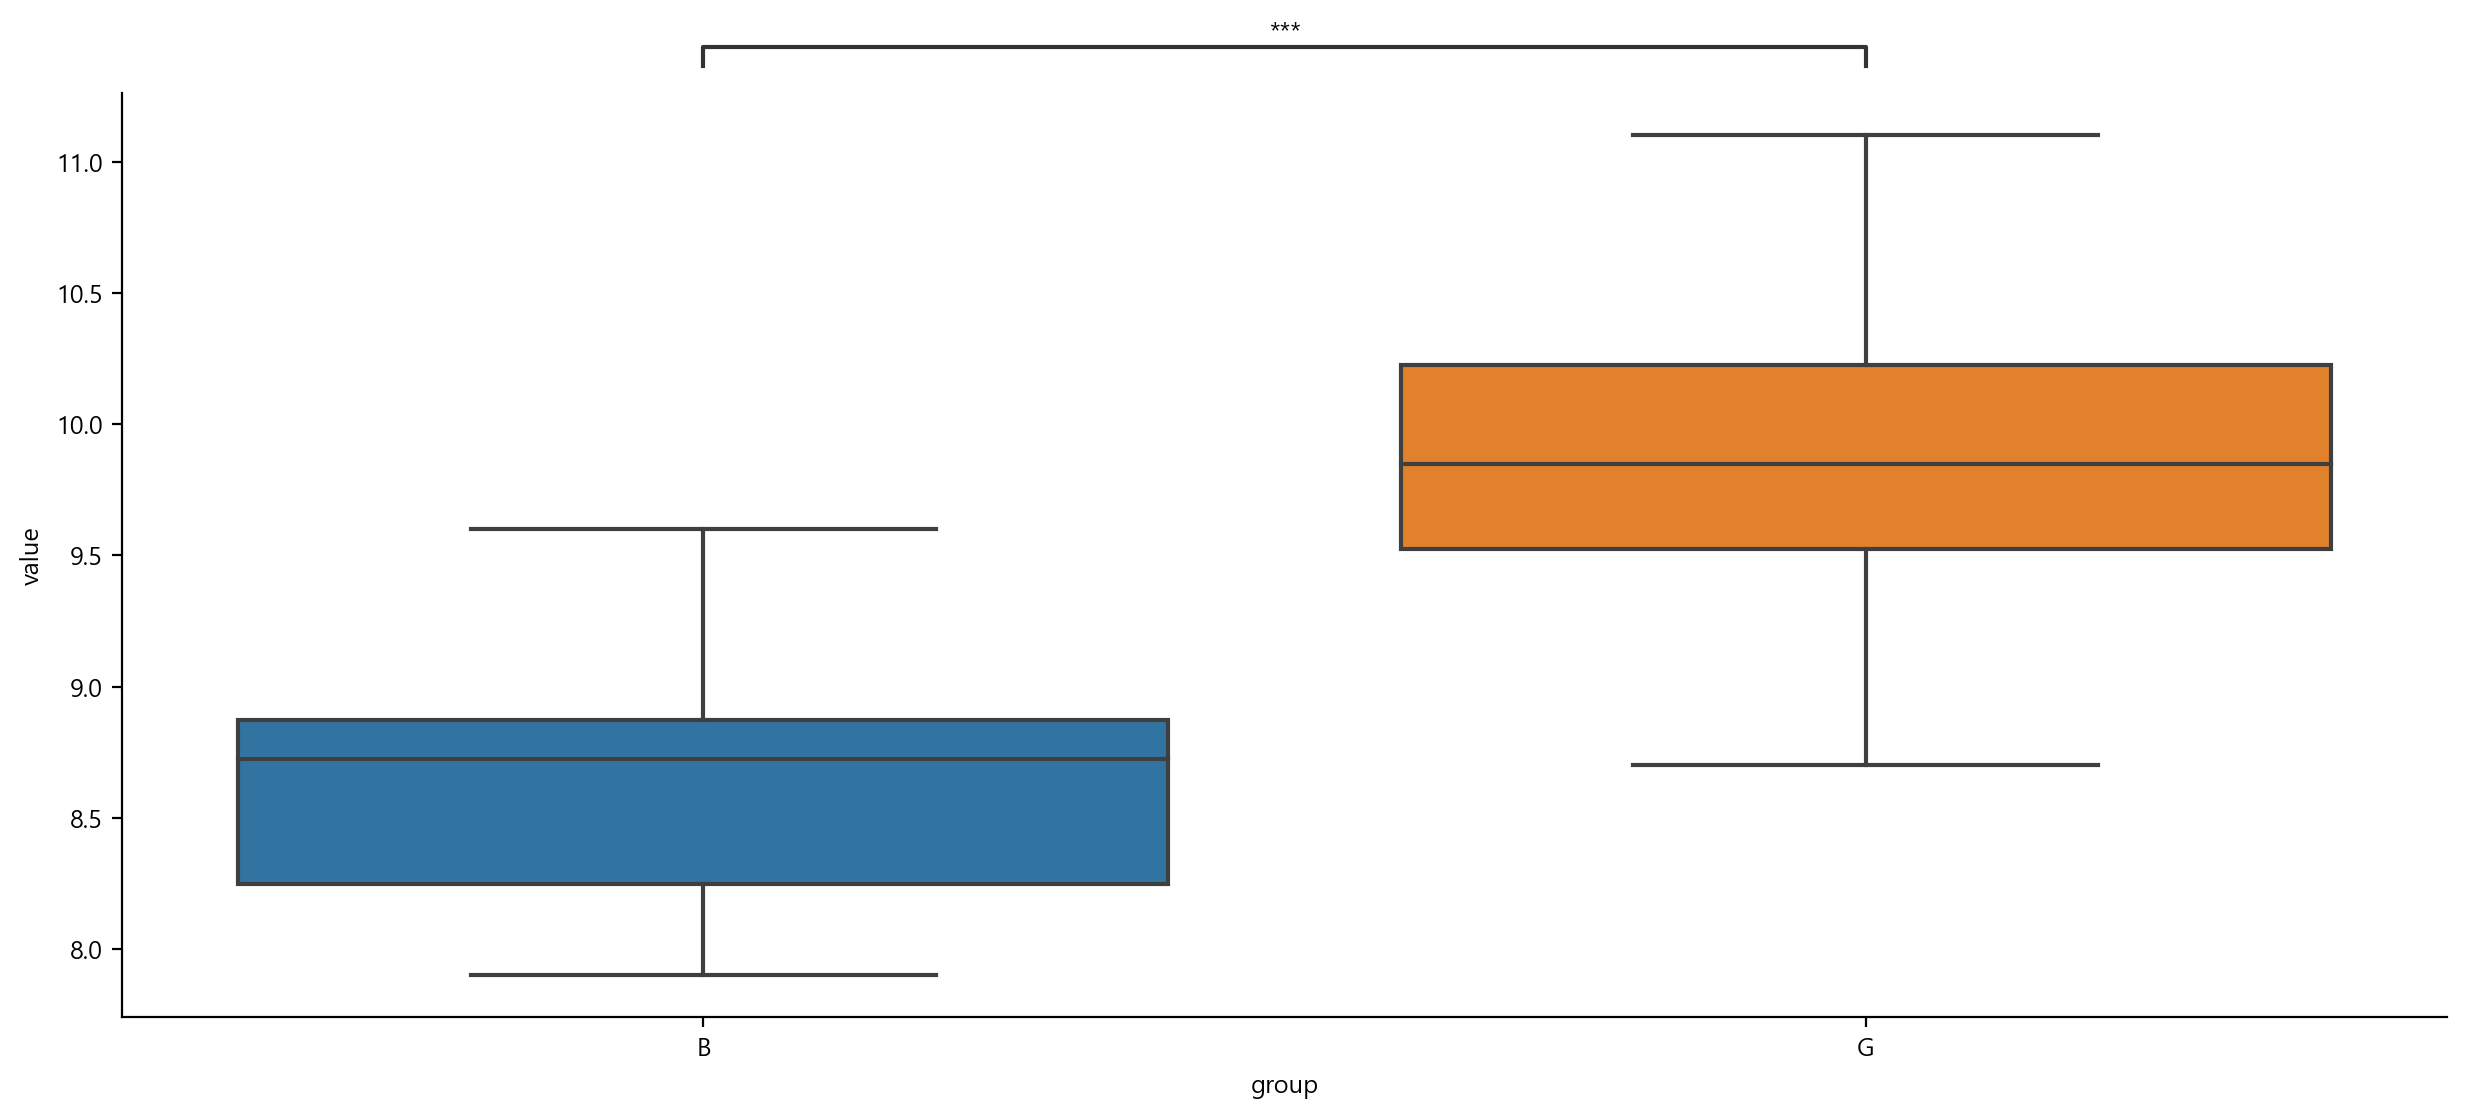

In [15]:
plt.figure()
ax = sns.boxplot(data = df, x='group', y = 'value')

annotator = Annotator(ax, data = df, x='group', y='value', pairs=[('B', 'G')])
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()

sns.despine()
plt.show()

##### 예제2 - 인공심장 효과 측정 

- 그룹1은 심장수술을 받고 부착한 인공장기의 기능이 정상적인 사람들
- 그룹2는 비정상으로 판명된 사람들 

- 두 그룹의 심장계수가 서로 차이가 나는 것인지 확인

- 단, 모든 데이터는 정규성을 만족한다고 가정

In [17]:
origin = pd.read_excel("../rawdata/heatrate.xlsx")
origin

,그룹1,그룹2
0,3.84,3.97
1,2.60,2.50
2,1.19,2.70
3,2.00,3.36
4,6.20,3.55
5,0.96,2.97
6,5.50,3.20
7,3.18,2.30


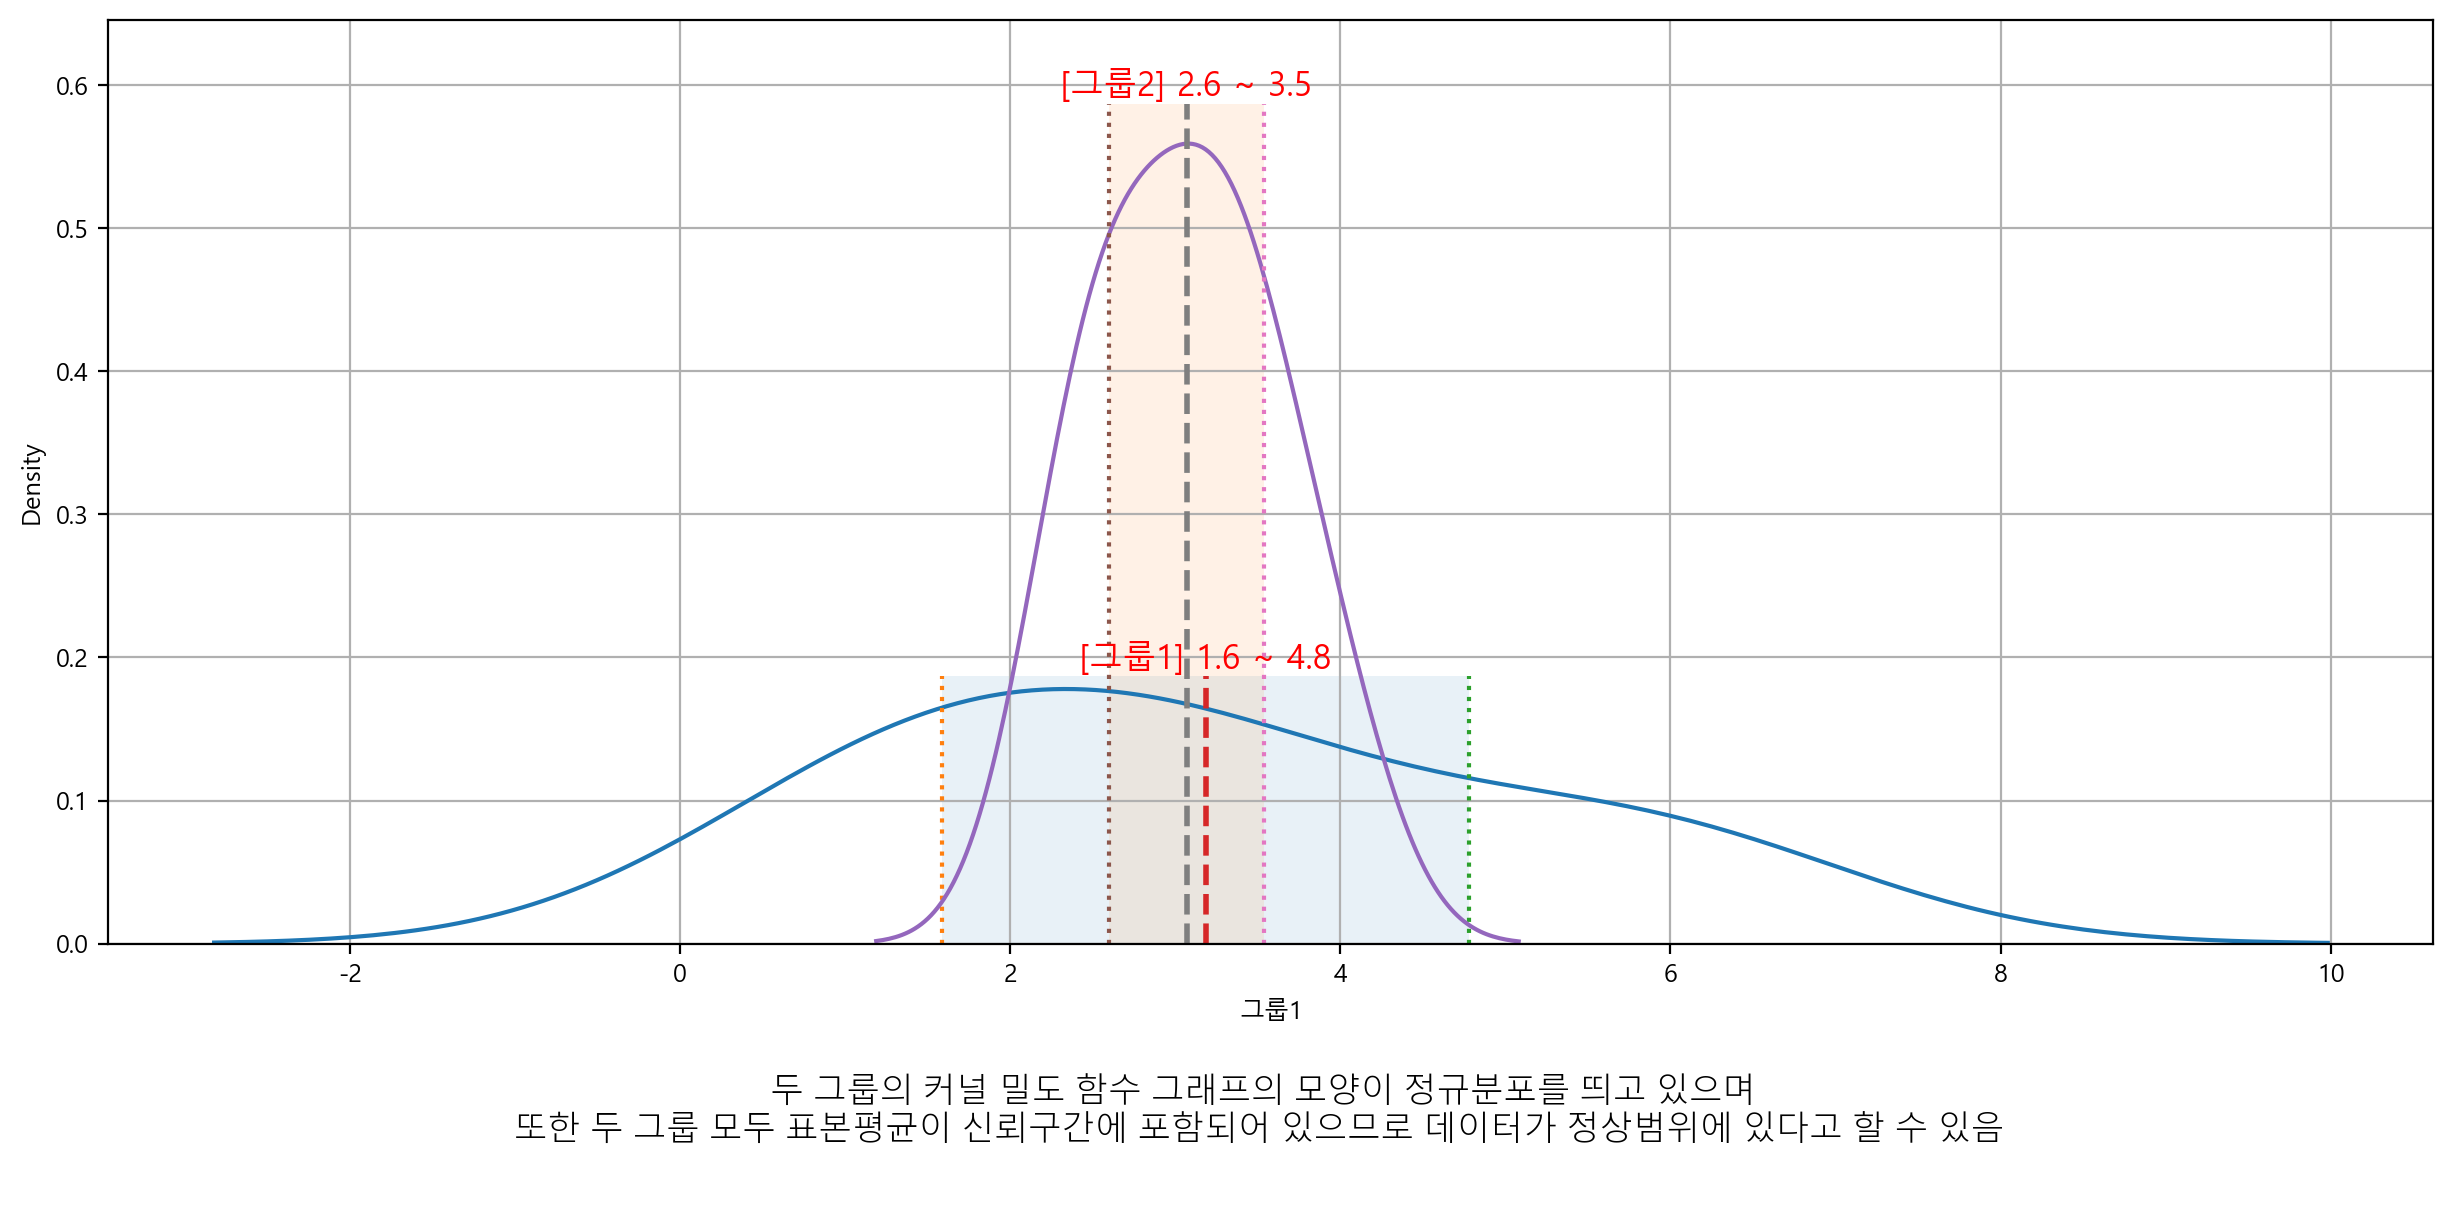

In [24]:
# 신뢰구간 측정

plt.figure()                 

for c in origin.columns:
    data = origin[c]                                    # 데이터만
    max = data                                          # 최대값
    clevel = 0.95                                       # 신뢰수준
    dof = len(data) - 1                                 # 자유도
    sample_mean = data.mean()                           # 표본평균
    sample_std = data.std(ddof=1)                       # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data))     # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
    
    sns.kdeplot(data=data) 
    
    xmin, xmax, ymin, ymax = plt.axis() 
    
    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)
    
    # 평균 그리기 
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)
       
    plt.text(x = (cmax - cmin) / 2 + cmin, 
             y = ymax,
             s = "[%s] %0.1f ~ %0.1f" % (c, cmin, cmax), 
             horizontalalignment="center",
             verticalalignment="bottom",
             fontdict={"size" : 12, "color": "red"})
    
plt.ylim(0, ymax*1.1)


txt = """ 두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며 
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있음 
"""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()

In [30]:
# 정규성
for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부 : {3}".format(c, s, p, p>=0.05))


[그룹1] statistic: 0.840, p-value: 0.657, 정규성 충족 여부 : True
[그룹2] statistic: 0.261, p-value: 0.878, 정규성 충족 여부 : True


In [27]:
# 등분산성
normal_dist = True   # 정규성 충족 여부 
data = origin.copy() # 원본 데이터 복사 
fields = list(map(lambda x : data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
    
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("[{0}] 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부 : {3}".format(n, s, p, p>=0.05))

[Bartlett] 검정: statistic: 8.029, p-value: 0.005, 등분산성 충족 여부 : False


#### Welch's T-test

- 등분산성이 만족되지 않는 경우 Welch's T-test를 수행하기 위해 equal_var파라미터에 False를 설정(기본값 = True)

In [33]:
s, p = ttest_ind(origin['그룹1'], origin['그룹2'], alternative="two-sided", equal_var=False)
"statistic: {0:.3f}, p-value: {1:.3f}, {2} 가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

# p-value가 0.05보다 크므로 귀무가설을 기각할 수 없고, 심장계수가 다르다고 판단할 근거가 없음 

'statistic: 0.163, p-value: 0.874, 귀무 가설 채택'

##### 가설검정 시각화

- `statannotations` 라이브러리는 `Welch's T-Test`를 직접 지원하기 때문에 시각화 코드에서 추가적으로 처리해야 할 부분은 없음 

In [35]:
df = pd.melt(origin, var_name="group", value_name="value")
df

,group,value
0,그룹1,3.84
1,그룹1,2.60
2,그룹1,1.19
3,그룹1,2.00
4,그룹1,6.20
5,그룹1,0.96
6,그룹1,5.50
7,그룹1,3.18
8,그룹2,3.97
9,그룹2,2.50


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

그룹1 vs. 그룹2: t-test independent samples, P_val:8.726e-01 t=1.633e-01


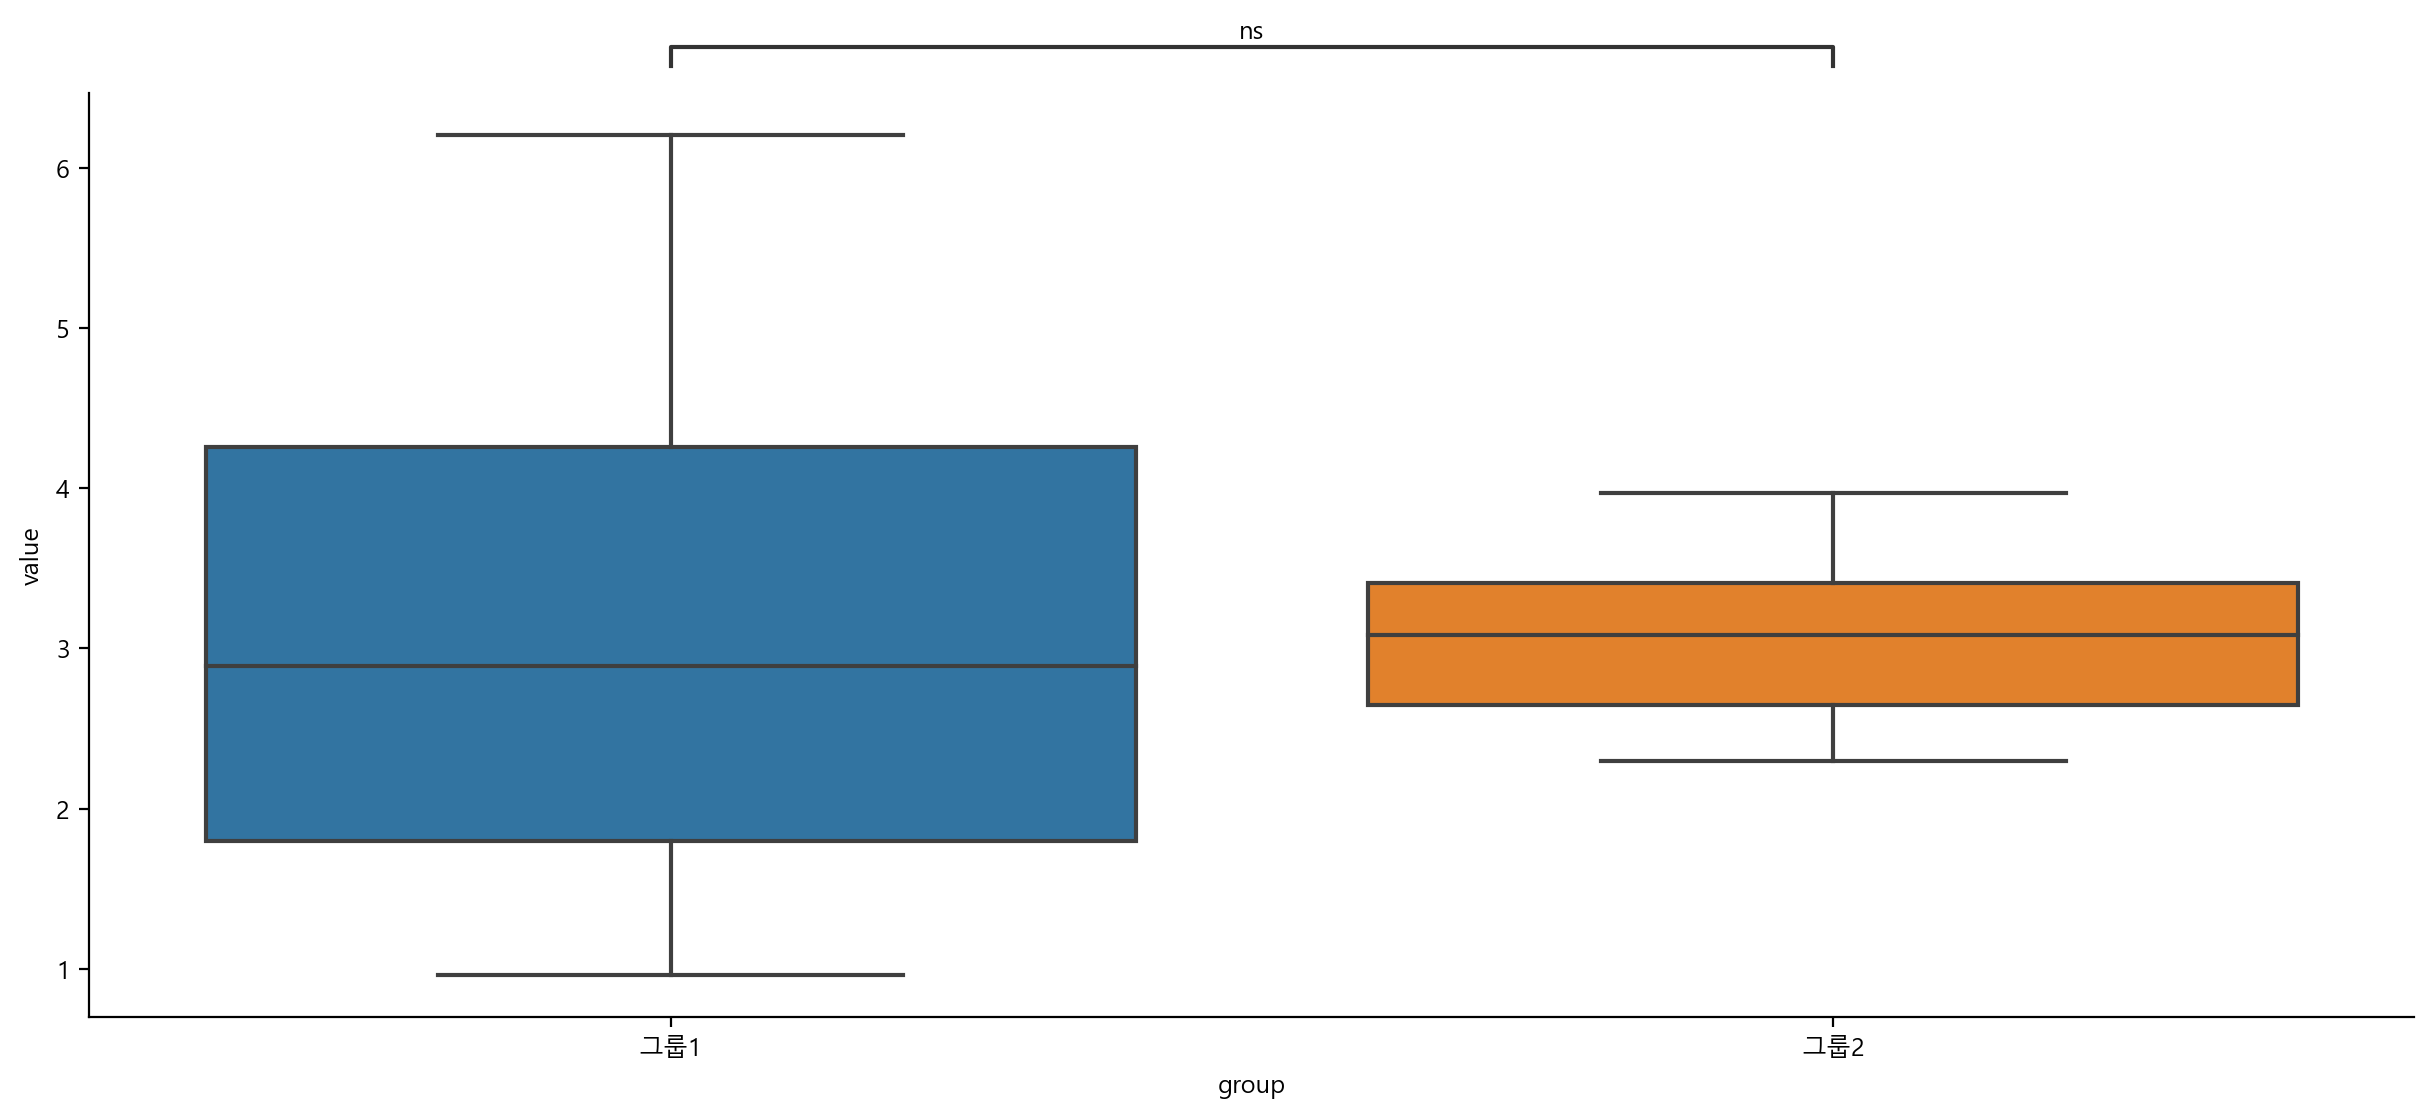

In [37]:
config = {
    "data" : df,
    "x" : "group",
    "y" : "value",
    "pairs" : [("그룹1", "그룹2")],
    "test" : "t-test_ind",
    "text_format" : "star",
    "loc" : "outside",
}

plt.figure()
ax = sns.boxplot(data = config["data"], x = config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data = config['data'], x = config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sns.despine()
plt.show()